<a href="https://colab.research.google.com/github/Mounikachig/hotel-booking/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#import pandas and numpy libraries
import numpy as np
import pandas as pd 

In [3]:
#import drive from colab and mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#create the data frame by reading the csv file
df = pd.read_csv("/content/drive/MyDrive/Hotel Bookings (data analysis capstone project)/Copy of Hotel Bookings.csv")

In [5]:
#Getting the information about the data that is to be analysed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### To discover important factors that govern the bookings, we need to explore the correlation between different variables and their characteristics with respect to the column 'is_cancelled'. As there are no null values present in the given data, the analysis would be quicker.  

In [6]:
#viewing the data to be analysed
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
#importing the necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Now, the correlation between different variables (which are of the float and int type) can be identified using correlation matrix

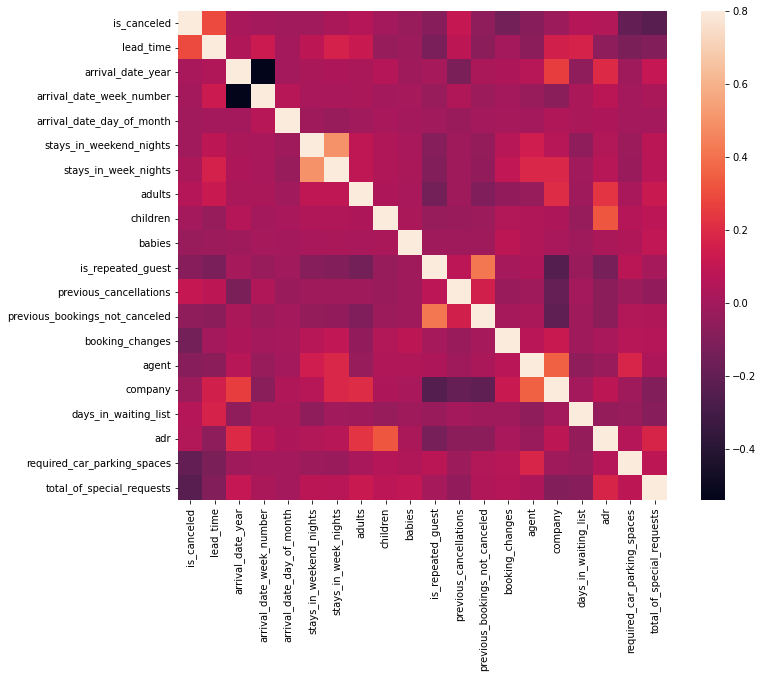

In [8]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

###The first two variables 'is_cancelled' and 'lead_time' in the correlation matrix are positively correlated. It means if the lead time is more, i.e, if we book early, there will be less chance of cancellation.

###We can see that arrival_date_year and arrival_date_week_number are perfectly negatively correlated. Stays in weekend nights and stays in week nights are positively correlated. The reason for this is the number of stays in weekend nights forms a subset of the number of stays in week nights. We can also see that the two columns,'is_repeated_guest' and 'previous bookings not cancelled' are positively correlated, which is again not surprising because a person is likely to be repeated guest if his previous bookings are not cancelled.

In [9]:
#finding the number of cancellations of bookings
notcancelled=0
cancelled=0
for i in df['is_canceled']:
  if i==0:
    notcancelled+=1
  if i==1:
    cancelled+=1  
print('The total bookings are:',notcancelled+cancelled)    
print(f'Of the total bookings, {notcancelled} are not cancelled and {cancelled} are cancelled')

The total bookings are: 119390
Of the total bookings, 75166 are not cancelled and 44224 are cancelled


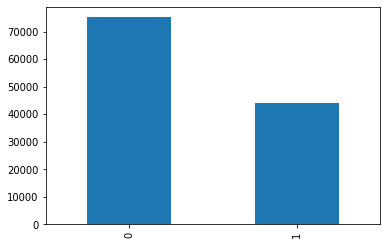

In [10]:
#plotting the values we found above
plt.subplot2grid((1,1), (0, 0))
df['is_canceled'].value_counts().plot(kind='bar') 

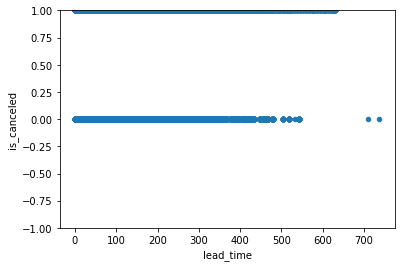

In [11]:
#scatter plot lead time/booking status(is_canceled)
var = 'lead_time'
data = pd.concat([df['is_canceled'], df[var]], axis=1)
data.plot.scatter(x=var, y='is_canceled', ylim=(-1,1));

###If the lead time is less than 500, the bookings did not show a significant partiality towards cancellation or non-cancellation. But when the lead time is between 500 and 650, the booking is most likely not cancelled. There are two outliers in which the lead time is greater than 700 and the bookins are cancelled. We can reason this as, if the lead time is very high, the hotel consultanty might think the customer might change his mind over time and hence cancel the bookings

###Heat map for the column 'is_cancelled' (zoomed version of heat maps)

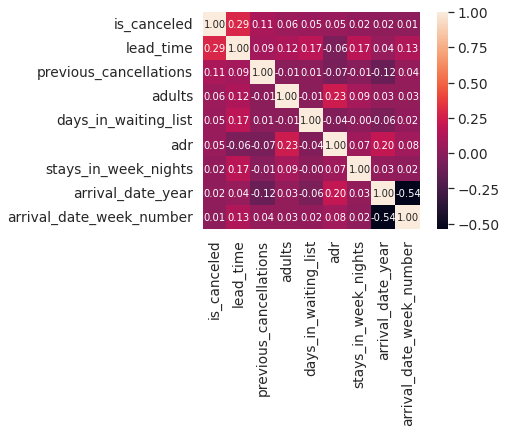

In [12]:
# correlation matrix of is_canceled
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


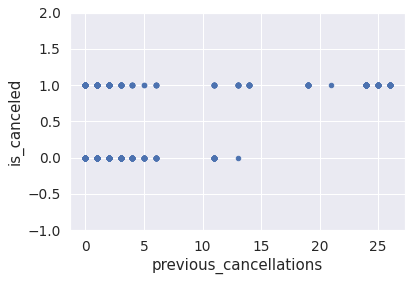

In [13]:
#scatter plot previous cancellations/booking status(is_canceled)
var = 'previous_cancellations'
data = pd.concat([df['is_canceled'], df[var]], axis=1)
data.plot.scatter(x=var, y='is_canceled', ylim=(-1,2));

###We can see from the above scatter plot that, as long as the previous cancellations are less than 14, they did not influence the status of booking(whether it is cancelled or not). When there are 14 or more previous cancellations,all the present bookings are also cancelled. Hence, the previous cancellations, when more than 13, greatly affect the bookings.

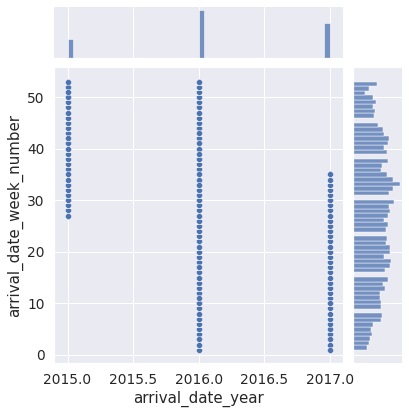

In [14]:
sns.jointplot(x='arrival_date_year', y='arrival_date_week_number', data=df[['arrival_date_year','arrival_date_week_number']])

###We knew that the above two variables are perfectly negatively correlated in the heat maps. From the above plot, we can see why it is so. In the initial year, i.e, in 2015, all bookings were made in the later weeks of the year. On the other hand, during the latest year (in 2017),all bookings were performed in the initial weeks of the year and no bookings were done towards the end of the year. However, in 2016, the bookings have been made throughout the year

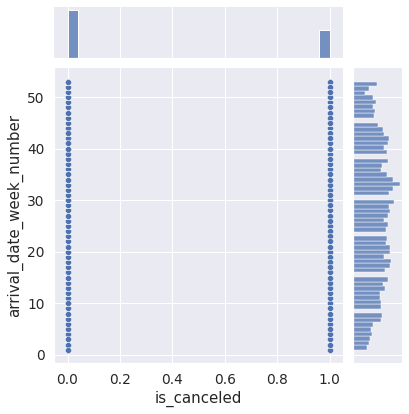

In [39]:
sns.jointplot(x='is_canceled', y='arrival_date_week_number', data=df[['is_canceled','arrival_date_week_number']])

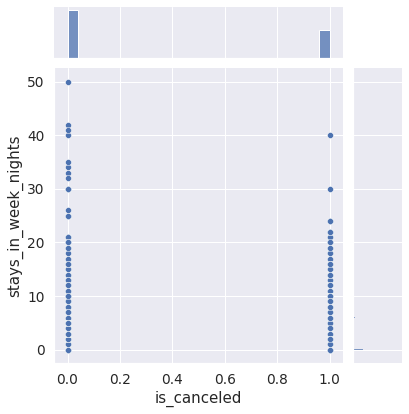

In [17]:
sns.jointplot(x='is_canceled', y='stays_in_week_nights', data=df[['is_canceled','stays_in_week_nights']])

###We can see that most of the bookings in the given data are made for upto 22 stays in week nights. When the number of stays in week nights are greater than 22, most of the bookings are not cancelled. This means, the booking is likely to be not cancelled if the stay is longer.

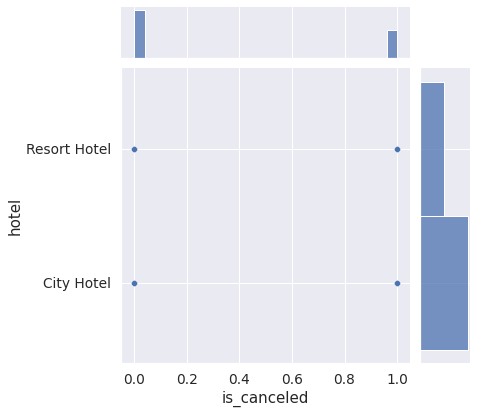

In [25]:
sns.jointplot(x='is_canceled', y='hotel', data=df[['is_canceled','hotel']])

###It is clear that most bookings were made for city hotel. Now, let's find out if one hotel has higher chance of cancellation of booking than other.

In [35]:
dict1={'resorth_cancelled':0,'cityh_cancelled':0,'resorth_ncancelled':0,'cityh_ncancelled':0}
for i in range(len(df['hotel'])):
  if df['hotel'][i]=='Resort Hotel':
    if df['is_canceled'][i]==0:
      dict1['resorth_ncancelled']+=1
    elif df['is_canceled'][i]==1:
      dict1['resorth_cancelled']+=1
  elif df['hotel'][i]=='City Hotel': 
    if df['is_canceled'][i]==0:
      dict1['cityh_ncancelled']+=1
    elif df['is_canceled'][i]==1:
      dict1['cityh_cancelled']+=1

print("The cancelation of bookings for Resort Hotel is",(dict1['resorth_cancelled']/(dict1['resorth_cancelled']+dict1['resorth_ncancelled']))*100 ,"percent")
print("The cancelation of bookings for City Hotel is",(dict1['cityh_cancelled']/(dict1['cityh_cancelled']+dict1['cityh_ncancelled']))*100 ,"percent")
dict1

The cancelation of bookings for Resort Hotel is 27.763354967548675 percent
The cancelation of bookings for City Hotel is 41.72696331778646 percent


{'cityh_cancelled': 33102,
 'cityh_ncancelled': 46228,
 'resorth_cancelled': 11122,
 'resorth_ncancelled': 28938}

###So, the probability of cancellation of booking is near to 50 percent for City Hotel while it is only 28 percent for Resort hotel.

#Outliers

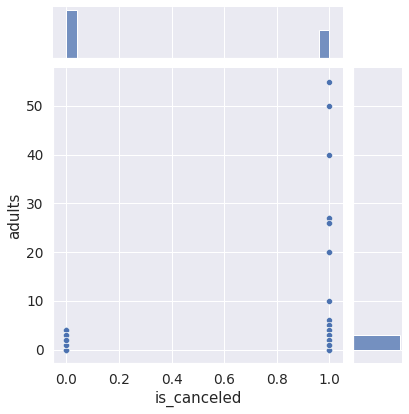

In [16]:
sns.jointplot(x='is_canceled', y='adults', data=df[['is_canceled','adults']])

###From the above plot, we can say that, in most of the cases, there are 0-3 adults, and in this case most of the bookings are not cancelled. On the other hand, when the adults are more than five the bookings are always cancelled. 

###It can be possible that the number of adults can be greater than 10 or 30. So, we keep the outliers here for the integrity of the data.

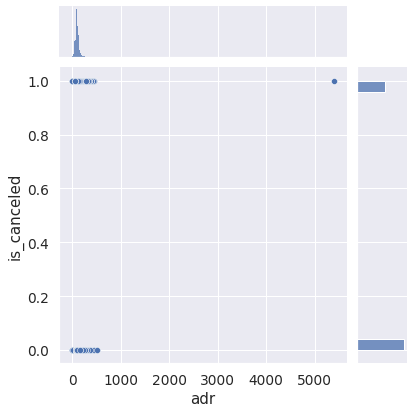

In [38]:
sns.jointplot(x='adr', y='is_canceled', data=df[['adr','is_canceled']])

###The effect of address (i.e, distance) on bookings is almost negligible when the  address is not very far like the outlier that has the address value of about 5500. In this special case, the booking has been cancelled.

###In this case also, the outlier can be included in the data to have an idea that when the address value is high, the booking is likely to be cancelled.

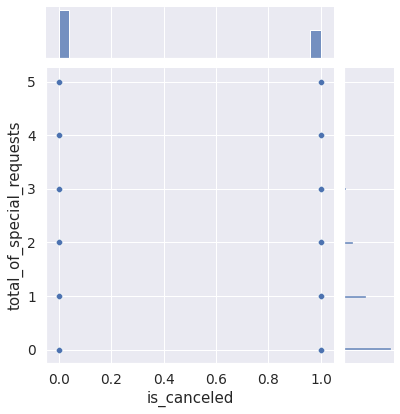

In [18]:
sns.jointplot(x='is_canceled', y='total_of_special_requests', data=df[['is_canceled','total_of_special_requests']])

###From the above plot, we can say that, in most of the cases there are no special requests. The number of special requests has been 1 or 2 in most of the other cases. The number of special requests did not increase the chance of cancellation of booking.   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


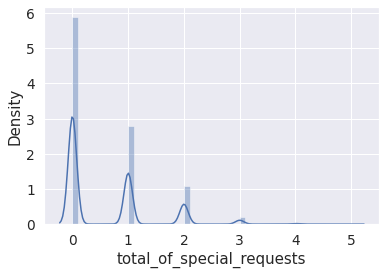

In [41]:
#histogram
sns.distplot(df['total_of_special_requests']);

###In this case also, the outliers can be included to maintain the verity of data.

#Conclusion

###It can be concluded that:
1. To avoid cancellation, it is best to have lead time value less than 500.
2. If the number of previous cancellations are greater than 13, the booking is likely cancelled.
3. 